In [2]:
import torch
import torchvision #!pip install torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),# to tensor: 
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
# ToTensor : numpy/PIL()H*W*C -> tensor(C*H*W) AND auto scalinng(0~1)
# Normalize:(mean, std, inplace)

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
import matplotlib.pyplot as plt
import numpy as np

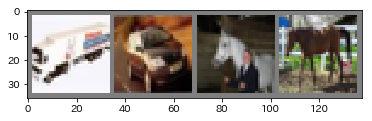

truck   car horse horse


In [7]:
def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()#get 1 mini batch

imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [8]:
import torch.nn as nn
import torch.nn.functional as F


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()


In [10]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9) #https://qiita.com/tokkuman/items/1944c00415d129ca0ee9


In [11]:
for epoch in range(2):
    sum_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs , labels = data
        optimizer.zero_grad()# optimizer initialize every data
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # update parameter

        sum_loss += loss.item()
        
        ## Each mini-batch ##
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, sum_loss / 2000))

            sum_loss = 0.0    

[1,  2000] loss: 2.235
[1,  4000] loss: 1.879
[1,  6000] loss: 1.659
[1,  8000] loss: 1.558
[1, 10000] loss: 1.507
[1, 12000] loss: 1.453
[2,  2000] loss: 1.397
[2,  4000] loss: 1.362
[2,  6000] loss: 1.324
[2,  8000] loss: 1.320
[2, 10000] loss: 1.309
[2, 12000] loss: 1.272


In [12]:
model_path =  './cifar_net.pth'
torch.save(net.state_dict(),model_path) #save model

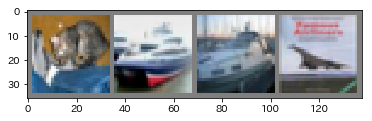

('GroundTruth: ', '  cat  ship  ship plane')


In [13]:
# Show ground truth 
dataiter = iter(testloader)

images, labels = dataiter.next()

imshow(
    torchvision.utils.make_grid(images)
)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
# test mini batch 
net = Net()
net.load_state_dict(torch.load(model_path))
outputs = net(images)

_, pred_labels = torch.max(outputs,1)#1 means axis:row

print('Predicted: ', ' '.join('%5s' % classes[pred_labels[j]]
                              for j in range(4)))

('Predicted: ', '  cat  ship truck plane')


In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    # Avoid update grad
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, pred_labels = torch.max(outputs, 1)
        c = (pred_labels == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 64 %
Accuracy of  bird : 38 %
Accuracy of   cat : 46 %
Accuracy of  deer : 48 %
Accuracy of   dog : 41 %
Accuracy of  frog : 68 %
Accuracy of horse : 66 %
Accuracy of  ship : 52 %
Accuracy of truck : 68 %


In [ ]:
# GPU tutorial is abbreviation 